WeRateDogs Data Wrangling Project



This data wrangling project focus on fixing the data quality and tidiness issues using python.

1.Gather Data

In [1]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer
#import pandas as pd


#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
#df_1=pd.read_csv('twitter-archive-enhanced.csv')

#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)


#count = 0
#fails_dict = {}
#start = timer()

#with open('tweet_json_recent.txt', 'w') as outfile:
    #limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
           # tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
       # except tweepy.TweepError as e:
           # print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [3]:

with open("tweet_json_recent.txt") as f:
    tweet_status = pd.DataFrame(json.loads(line) for line in f)

In [4]:
tweet_status.shape

(1774, 32)

The datas collected from WeRateDogs twitter page with ids are stored in the data frame 'tweet_status'. It has 1774 rows and 32 columns.

Creating a Dataframe named "df_sample" from twitter-archive-enhanced.csv provided by Udacity.

In [5]:
df_sample=pd.read_csv('twitter-archive-enhanced.csv')
df_sample.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_sample.shape[0]

2356

In [8]:
df_sample.shape[1]

17

The csv file provided by udacity has 2356 rows and 17 columns.Since few tweets were deleted, we got only 2331 rows now.

So, for better results lets continue analysing using the csv file provided by udacity.

ASSESSING THE DATA

In [9]:
df_sample.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#total missing values
df_sample.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_sample.name.str.islower().sum()

109

In [13]:
df_sample.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_sample.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

10 is the standard denominator, whereas others could be an error.

In [15]:
df_sample.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Extreme values could be errors - 1776,960

In [16]:
df_sample.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Image Predictions

In [17]:

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [18]:
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [19]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [22]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
df_sample_clean = df_sample.copy()
image_predictions_clean = image_predictions.copy()
tweet_status_clean = tweet_status.copy()
#making copies

In [24]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
df_sample_clean=df_sample_clean[df_sample_clean['in_reply_to_status_id'].isnull()]

In [26]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

The column "in_reply_to_status_id" is showing if the tweet was original or a reply to another tweet. Lets drop all the rows where the value is not NaN. 

Quality issues 1:

Dropping unneccesary columns like in_reply_to_status_id,in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp

In [27]:
df_sample_clean=df_sample_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [28]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


Quality issues 2:

The column expanded urls are also unnecessary, so its better to drop that column.

In [29]:
df_sample_clean=df_sample_clean.drop(['expanded_urls'],axis=1)

In [30]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


Tidiness issue 1:

Columns 'doggo', 'floofer', 'pupper', 'puppo' in df_sample should belong to one column named stage

In [31]:
stage=['doggo','floofer','pupper','puppo']
for i in stage:
    df_sample_clean[i]=df_sample_clean[i].replace('None','')

In [32]:
df_sample_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,


In [33]:
df_sample_clean['stage']=df_sample_clean.doggo.str.cat(df_sample_clean.floofer).str.cat(df_sample_clean.pupper).str.cat(df_sample_clean.puppo)


In [34]:
df_sample_clean=df_sample_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [35]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 2278 non-null object
dtypes: int64(3), object(5)
memory usage: 160.2+ KB


In [36]:

df_sample_clean['stage']=df_sample_clean['stage'].replace('',np.nan)

In [37]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 372 non-null object
dtypes: int64(3), object(5)
memory usage: 160.2+ KB


In [38]:
df_sample_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [39]:
print(df_sample.shape)
print(df_sample_clean.shape)

(2356, 17)
(2278, 8)


Tidiness issue 2 :

Renaming the columns p1,p2 and p3 in image_predictions

In [40]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'Breed_probability_1','p2':'Breed_probability_2','p3':'Breed_probability_3'})

In [42]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_probability_1,p1_conf,p1_dog,Breed_probability_2,p2_conf,p2_dog,Breed_probability_3,p3_conf,p3_dog
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.005590,True
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
1741,822610361945911296,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1,cocker_spaniel,0.664487,True,Norfolk_terrier,0.075089,True,Norwich_terrier,0.059644,True
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False
1557,793226087023144960,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,1,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,0.083643,True


In [43]:
tweet_status.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,1774.000000,1.774000e+03,5.900000e+01,5.900000e+01,2.600000e+01,1774.000000
mean,9026.783540,7.641160e+17,7.659055e+17,2.662802e+16,8.113972e+17,3157.382187
std,12215.149329,6.363850e+16,7.307693e+16,1.437385e+17,6.295843e+16,4731.194421
min,0.000000,6.772289e+17,6.671522e+17,1.185634e+07,6.721083e+17,1.000000
25%,2370.250000,7.036660e+17,6.922296e+17,1.875114e+08,7.761338e+17,884.000000
50%,4641.000000,7.576687e+17,7.590995e+17,4.196984e+09,8.281173e+17,1749.500000
75%,11493.500000,8.178153e+17,8.366658e+17,4.196984e+09,8.637581e+17,3609.500000
max,149759.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,73824.000000


In [44]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       1774 non-null object
display_text_range               1774 non-null object
entities                         1774 non-null object
extended_entities                1517 non-null object
favorite_count                   1774 non-null int64
favorited                        1774 non-null bool
full_text                        1774 non-null object
geo                              0 non-null object
id                               1774 non-null int64
id_str                           1774 non-null object
in_reply_to_screen_name          59 non-null object
in_reply_to_status_id            59 non-null float64
in_reply_to_status_id_str        59 non-null object
in_reply_to_user_id              59 non-null float64
in_reply_to_user_id_str          59 non-null obj

In [45]:
assert [tweet_status.id.duplicated() == False]

In [46]:
tweet_status['id'].sample(5)

1772    677269281705472000
13      889638837579907072
402     822462944365645825
1559    687102708889812993
639     791774931465953280
Name: id, dtype: int64

In [47]:
df_sample[df_sample.tweet_id == 890729181411237888]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [48]:
tweet_status[tweet_status.id == 890729181411237888]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",58728,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,16409,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [49]:
df1 = tweet_status.filter(['id','created_at'])
df1 = df1.rename(columns={'id': 'tweet_id'})
df2 = df_sample.filter(['tweet_id', 'timestamp'])

dfmerged = pd.merge(df1, df2, how='inner', on=['tweet_id'])

In [50]:

dfmerged.sample(5)

,tweet_id,created_at,timestamp
1429,695629776980148225,Fri Feb 05 15:27:17 +0000 2016,2016-02-05 15:27:17 +0000
1158,718971898235854848,Sun Apr 10 01:20:33 +0000 2016,2016-04-10 01:20:33 +0000
563,800443802682937345,Sun Nov 20 21:00:48 +0000 2016,2016-11-20 21:00:48 +0000
1589,685315239903100929,Fri Jan 08 04:21:00 +0000 2016,2016-01-08 04:21:00 +0000
860,760290219849637889,Tue Aug 02 01:44:48 +0000 2016,2016-08-02 01:44:48 +0000


Tidiness issue 3:

Deleting unwanted columns in tweet_status_clean dataframe.

In [51]:

tweet_status_clean = tweet_status_clean.drop(['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id_str'], axis=1)

In [52]:
tweet_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 28 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       1774 non-null object
display_text_range               1774 non-null object
entities                         1774 non-null object
extended_entities                1517 non-null object
favorite_count                   1774 non-null int64
favorited                        1774 non-null bool
full_text                        1774 non-null object
geo                              0 non-null object
id                               1774 non-null int64
id_str                           1774 non-null object
in_reply_to_status_id_str        59 non-null object
is_quote_status                  1774 non-null bool
lang                             1774 non-null object
place                            1 non-null object
possibly_sensitive               1650 non-null ob

Quality issues 3:

Change the datatype of 'timestamp' to datetime


In [53]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 372 non-null object
dtypes: int64(3), object(5)
memory usage: 160.2+ KB


In [54]:
df_sample_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
2215,668542336805281792,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,10,10,None,NaN
421,821886076407029760,2017-01-19 01:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He was just called a good boy...,13,10,Jimison,NaN
2266,667530908589760512,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,10,10,Naphaniel,NaN
2305,666837028449972224,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,3,10,None,NaN
668,790277117346975746,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,11,10,Bruce,NaN


In [55]:
df_sample_clean['timestamp']=pd.to_datetime(df_sample_clean['timestamp'])

In [56]:
df_sample_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [57]:
df_sample_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2143
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Quality issues 4 :

Replacing values of source with Twitter for iPhone,Vine - Make a Scene,Twitter Web Client,TweetDeck

In [58]:
df_sample_clean['source']=df_sample_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
df_sample_clean['source']=df_sample_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
df_sample_clean['source']=df_sample_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_sample_clean['source']=df_sample_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')


In [59]:
df_sample_clean['source'].value_counts()

Twitter for iPhone     2143
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Quality issues 5:

Default value of rating_denominator column is 10. since many rows have different values, let check how many rows had values not equal to 10.

In [60]:
df_sample_clean['rating_denominator'].value_counts()

10     2260
11        3
50        3
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [61]:
len(df_sample_clean[df_sample_clean['rating_denominator']!=10])

18

In [62]:
df1 = df_sample_clean[df_sample_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80


In [63]:
df_sample_clean.loc[df_sample_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
df_sample_clean.loc[df_sample_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
df_sample_clean.loc[df_sample_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
df_sample_clean.loc[df_sample_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
df_sample_clean.loc[df_sample_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [64]:
df_sample_clean.loc[df_sample_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",9,10,None,NaN


Quality issues 6:

The values of numerator may not be greater than 20. So better to find out how many rows have such values.

In [65]:
df_sample_clean['rating_numerator'].value_counts()

12      544
10      455
11      451
13      331
9       155
8       102
7        53
14       49
5        35
6        32
3        19
4        16
2         9
1         6
75        2
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
15        1
27        1
45        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [66]:
len(df_sample_clean[df_sample_clean['rating_numerator']>20])

19

Among 2278 rows, 19 rows have unrelated values(>20) in rating_numerator.

In [67]:
df_sample_clean.loc[df_sample_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
df_sample_clean.loc[df_sample_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
df_sample_clean.loc[df_sample_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
df_sample_clean.loc[df_sample_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
df_sample_clean.loc[df_sample_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [68]:
df_sample_clean.loc[df_sample_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",14,10,None,NaN


Quality issues 7:

correcting the value of name column

In [69]:
df_sample_clean['name'].value_counts()

None           668
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
Sadie            8
the              8
Daisy            7
Toby             7
Buddy            7
Bailey           7
an               7
Oscar            6
Koda             6
Rusty            6
Jack             6
Milo             6
Leo              6
Bella            6
Scout            6
Dave             6
Jax              6
Stanley          6
Phil             5
              ... 
Chase            1
Tug              1
Amy              1
Jackie           1
Jessifer         1
Koko             1
Vinscent         1
Kaiya            1
Hubertson        1
Ron              1
Richie           1
Mabel            1
Shakespeare      1
Mya              1
Rhino            1
Ember            1
Marq             1
Ralph            1
Opie             1
Billy            1
Dale             1
Reagan      

In [70]:
# renaming a,an,the,all names to none.
name_list=['a','an','the','all']
for i in name_list:
    df_sample_clean['name'].replace(i,'None',inplace=True)

In [71]:
df_sample_clean['name'].value_counts()

None         739
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
Bailey         7
Buddy          7
Toby           7
Daisy          7
Rusty          6
Stanley        6
Leo            6
Jack           6
Koda           6
Oscar          6
Scout          6
Milo           6
Dave           6
Bella          6
Jax            6
very           5
Sunny          5
Finn           5
Gus            5
            ... 
Barney         1
Katie          1
Harnold        1
Comet          1
Skye           1
Darla          1
Bodie          1
Carll          1
Dook           1
Maks           1
Edd            1
BeBe           1
Traviss        1
Sora           1
Brian          1
Mutt           1
Willie         1
Tino           1
Jazzy          1
Geoff          1
Kathmandu      1
Pilot          1
Bradley        1
Lolo           1
Pluto          1
Franq          1
Al             1
Georgie       

In [72]:
df_sample_clean['name'].str.islower().sum()

38

Quality issues 8 :

Capitalising all the first small letters of the name column.

In [73]:
df_sample_clean['name']=df_sample_clean.name.str.capitalize()

In [74]:
df_sample_clean['name'].str.islower().sum()

0

Quality issues 9:

In image_predictions, better to rename p1_conf,p2_conf and p3_conf column names to prediction_confidence respectively.

In [75]:
image_prediction_clean=image_predictions_clean.rename(columns={'p1_conf':'BP1_confidence_1','p1_dog':'First_Dog',
                                'p2_conf':'BP2_confidence_2','p2_dog':'Second_Dog',
                                'p3_conf':'BP3_confidence_3','p3_dog':'Third_Dog'},inplace=True)

In [76]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_probability_1,BP1_confidence_1,First_Dog,Breed_probability_2,BP2_confidence_2,Second_Dog,Breed_probability_3,BP3_confidence_3,Third_Dog
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
934,703382836347330562,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True


In [77]:
image_predictions_clean['Breed_probability_1'].str.islower().sum()

1135

In [78]:
image_predictions_clean['Breed_probability_2'].str.islower().sum()

1096

In [79]:
image_predictions_clean['Breed_probability_3'].str.islower().sum()

1131

Quality issues 10:

Capitalising the names in Breed_probability columns

In [80]:
#image_predictions_clean['Breed_probability_1']=df_sample_clean.Breed_probability_1.str.capitalize()
#image_predictions_clean['Breed_probability_2']=df_sample_clean.Breed_probability_2.str.capitalize()
#image_predictions_clean['Breed_probability_3']=df_sample_clean.Breed_probability_3.str.capitalize()

In [81]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id               2075 non-null int64
jpg_url                2075 non-null object
img_num                2075 non-null int64
Breed_probability_1    2075 non-null object
BP1_confidence_1       2075 non-null float64
First_Dog              2075 non-null bool
Breed_probability_2    2075 non-null object
BP2_confidence_2       2075 non-null float64
Second_Dog             2075 non-null bool
Breed_probability_3    2075 non-null object
BP3_confidence_3       2075 non-null float64
Third_Dog              2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
image_predictions_clean['Breed_probability_1']=image_predictions_clean.Breed_probability_1.str.capitalize()

In [83]:
image_predictions_clean['Breed_probability_2']=image_predictions_clean.Breed_probability_2.str.capitalize()

In [84]:
image_predictions_clean['Breed_probability_3']=image_predictions_clean.Breed_probability_3.str.capitalize()

In [85]:
image_predictions_clean['Breed_probability_1'].str.islower().sum()

0

In [86]:
image_predictions_clean['Breed_probability_2'].str.islower().sum()

0

In [87]:
image_predictions_clean['Breed_probability_3'].str.islower().sum()

0

In [88]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_probability_1,BP1_confidence_1,First_Dog,Breed_probability_2,BP2_confidence_2,Second_Dog,Breed_probability_3,BP3_confidence_3,Third_Dog
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,Pug,0.956565,True,Swing,0.018907,False,Toy_poodle,0.013544,True
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,Hyena,0.736871,False,Chesapeake_bay_retriever,0.087503,True,Meerkat,0.042058,False
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,Briard,0.982755,True,Soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_flandres,0.004693,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,Microphone,0.096063,False,Accordion,0.094075,False,Drumstick,0.061113,False
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,Redbone,0.382113,True,Malinois,0.249943,True,Miniature_pinscher,0.070926,True


In [89]:
df_sample_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null datetime64[ns]
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
stage                 372 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 160.2+ KB


In [90]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id               2075 non-null int64
jpg_url                2075 non-null object
img_num                2075 non-null int64
Breed_probability_1    2075 non-null object
BP1_confidence_1       2075 non-null float64
First_Dog              2075 non-null bool
Breed_probability_2    2075 non-null object
BP2_confidence_2       2075 non-null float64
Second_Dog             2075 non-null bool
Breed_probability_3    2075 non-null object
BP3_confidence_3       2075 non-null float64
Third_Dog              2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [91]:
df_sample_clean.to_csv('twitter_archive_master.csv',encoding='utf-8')

In [92]:
image_predictions_clean.to_csv('image_predictions_master.csv',encoding='utf-8')

In [93]:
tweet_status_clean.to_csv('tweet_status_master.csv',encoding='utf-8')

Twitter for iPhone     2143
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64


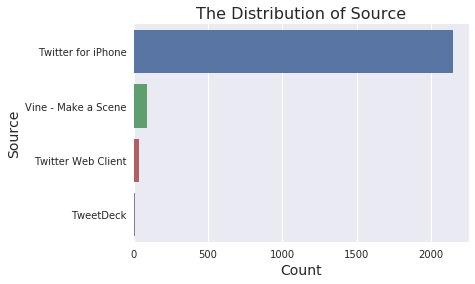

In [94]:

indexed_source = df_sample_clean['source'].value_counts().index
print(df_sample_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = df_sample_clean, y = 'source', order = indexed_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)
plt.show()

Text(0.5,1,'The Distribution of Dog Stages')

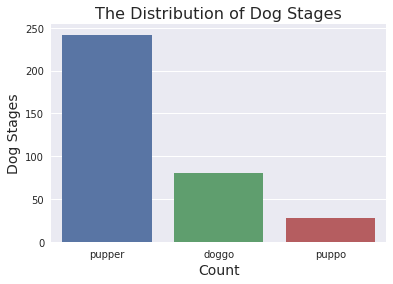

In [95]:
indexed_stage = df_sample_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = df_sample_clean, x = 'stage', order = indexed_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

Similarly, I check the distribution of dog stages. It shows that ‘pupper’ (a small doggo, usually younger) is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

In [96]:
image_predictions_clean['Breed_probability_1'].value_counts().head(10)

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Chow                   44
Samoyed                43
Toy_poodle             39
Pomeranian             38
Cocker_spaniel         30
Name: Breed_probability_1, dtype: int64

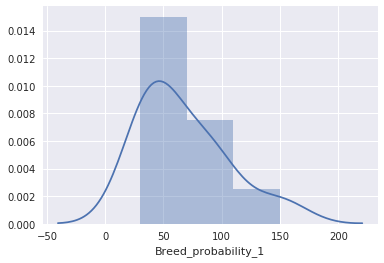

In [97]:
#sns.set_theme()
sns.set(style='darkgrid')
x=image_predictions_clean['Breed_probability_1'].value_counts().head(10)
ax = sns.distplot(x)

These breeds above are the top 10 dog breeds this model predicted. Golden retriever and Labrador retriever are top 2 and both over 100 predictions.